# Frequentist vs Bayesian Statistics: a Practical Introduction to Parameter Estimation with Python

### Parameter estimation is a critical component of statistical inference, data science, and machine learning workflows. Though this topic can be complex, we offer an introduction to the process comparing two approaches with some theory and some code.

In [3]:
%%capture
#Install Plotly
# !pip install plotly

A parameter is a variable that governs the relationship between an input variable (sometimes also called a predictor or an independent variable) and an output variable (also know as an outcome or a dependent variable). We rarely have complete information, and thus we are forced to come up with ways in which we can understand the relationship between the information we do have access to (our predictor variables) and the information we are trying to predict (our outcome variable).

Although the true value of the parameter is inherently unknowable, we can work with their approximations and in this blog post, we're going to look at two different approaches to doing so. We'll start with the Frequentist -  or Classical approach- using Maximum Likelihood Estimation (MLE) before moving on to the Bayesian framework for parameter estimation. Our intention is not to argue in favor of one approach or another, but rather to explain the difference in workflows and begin a more general discussion around statistical inference and what we are trying to accomplish as statistical practitioners.

## The Binominal Distribution
We'll center this discussion around the example of a coin-flip (as is mandatory of any statistics text). Specifically, we are interested in accurately predicting how often a coin will come up heads, or the probability that a coin will come up heads in a given flip. In this case, the outcome of our coin-flip is our random variable and it can take on the value of 0 (Tails) or 1 (Heads).
The outcome of a single coin-flip then can be modeled as a Bernoulli process where Y  is the outcome of an individual coin flip with two potential values, heads or tails. Formally, we have:

$Y_{i}\sim Bernoulli(p)$

In this context, p is the probability of the coin coming up heads, and this is our parameter of interest. Our task will be to estimate p as precisely as possible.
As such, we have:

$P(\text{Y = 1 or Heads}) = p$

$P(\text{Y=0 or Tails}) = 1-p$

So, given a coin, how would we estimate p? 

For now, we aren't going to give you any additional information about this coin, and we'll discuss later on why this is important. For now though, we'll want to come up with ways in which we can get more information about p, we need to observe some data! In this case, we'll obtain data by, well, flipping the coin. 
We could just flip the coin once but this wouldn't be very informative. Imagine that the truth is that p=0.5 and after one flip we observe a head. 

If we only relied on that one flip for our information, we might conclude that p=1, so that the probability of flipping heads is 100%, and we'd flip heads all the time! In fact this is the answer that the Frequentist approach would give us, but more on that later.
What we'll want to do instead is observe a lot of flips. Suppose that we conduct n independent coin-flips, where each coin-flip is of course a Bernoulli random variable. Of those n flips, the total number of heads, X, is a binomial random variable with parameters n and p (the number of trials, or coin flips and the probability of success, or the probability of tossing heads).
Formally, we have:

$X\sim Binomial(n, p)$

By flipping the coin over and over again, we'll be able to gain more and more information about our parameter of interest, p. 

## Simulating Data
Let's assume we have a biased coin that has a 60% probability of flipping heads, and we want to estimate that probability. We can use the scipy.stats library to draw outcomes from the Binomial distribution.
Simulations are very useful because we can hard-code the "true" parameters, which then allows us compare how different frameworks compare in approximating the parameter.

Let's simulate 10000 coin flips and observe some results.

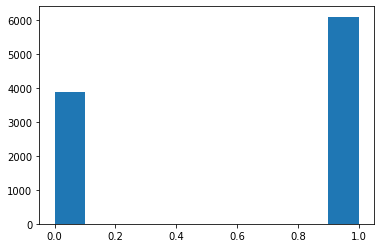

In [2]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
np.random.seed(42) # set seed for reproducibility
# Set the probability of heads = 0.6
p = 0.6
# Flip the Coin 10000 times and observe the results
n_trials = 10000
data = stats.bernoulli.rvs(p, size = n_trials)
# plot results
plt.hist(data);

In [4]:
sum(data)

6108

As expected, the split between heads and tails is close to 60/40, and that's simply because we've coded the parameter that way! 

Now that we have our data, let's compare how the Frequentist and Bayesian approaches obtain the parameter of interest: _p_.

## The Frequentist Approach

Frequentist statistics uses MLE. While a full treatment of MLE is outside the scope of this blog post, its working is in its name: it fits a model that maximizes the likelihood of having observed the observed data.

For the Binomial distribution, the MLE is the sample proportion of success.[1]

$\text{MLE} = \frac{\text{Number of successes}}{\text{Number of trials}}$

As such the standard error is simply the standard deviation scaled by $\sqrt{N}$. 

So S.E. =  $\sqrt{\frac{p*(1-p)}{N}}$

We can find our 95% confidence intervals simply by multiplying the standard error with the 95% Z-stat, which is equal to 1.96.

$\text{S.D.} = \sqrt{p*(1-p)}$

$\text{S.E.} =  \sqrt{\frac{p*(1-p)}{N}}$

$\text{C.I Bounds} = \text{MLE} \pm 1.96*\text{S.E.}$

Let's look at what happens when we toss 10 coins. Since we've already simulated 10000 coin flips above, we can directly use the first 10 flips from the results.

In [5]:
i = 10
results = {}
sample = data[:i]
p_estimated = np.mean(sample)
q_estimated = 1 - p_estimated
standard_error = np.sqrt(p_estimated*q_estimated)/np.sqrt(i)
ci = 1.96*standard_error 
# store results in a dict
results['number_of_heads'] = sample.sum()
results['p_estimated'] = p_estimated
results['q_estimated'] = q_estimated
results['standard_error'] = standard_error
results['low'] = p_estimated - ci
results['high'] = p_estimated + ci

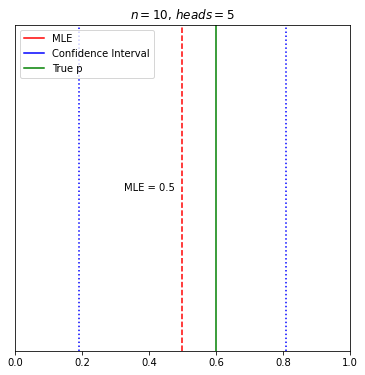

In [6]:
import matplotlib.lines as mlines

fig, axs = plt.subplots(figsize = (6,6))

axs.axvline(results['p_estimated'], color = 'red', linestyle = "dashed")
axs.axvline(0.6, color = 'green', linestyle = "solid")
axs.axvline(results['low'], color = 'blue', linestyle='dotted')
axs.axvline(results['high'], color = 'blue', linestyle='dotted')
axs.get_yaxis().set_visible(False)
axs.title.set_text("$ n = $" + str(i) + ", $heads = $" + str(results['number_of_heads']))
axs.text(results['p_estimated'] - 0.1, 0.5, 'MLE = ' + str(np.round(results['p_estimated'], 2)), 
         horizontalalignment='center', verticalalignment='center', transform=axs.transAxes)

blue_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='Confidence Interval')
red_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='MLE')
green_line = mlines.Line2D([], [], color='green',
                          markersize=15, label='True p')

axs.legend(handles = [red_line, blue_line, green_line], loc=2);

In [7]:
fig.savefig('mle1')

Because we have observed 5 heads, the MLE is 0.5 (recall that the true value of p is 0.6). 

The uncertainty is captured by the confidence intervals, which indicate that the true value of p has a 95% probability of being between ~ 0.2 and ~ 0.8. 

Since the confidence intervals are proportional to the sample size, we can expect them to shrink as the number of coin flips increases - the more data we have the more confident we are about our predictions. 

To illustrate that, let's see what happens when we flip increasingly large amounts of coins.

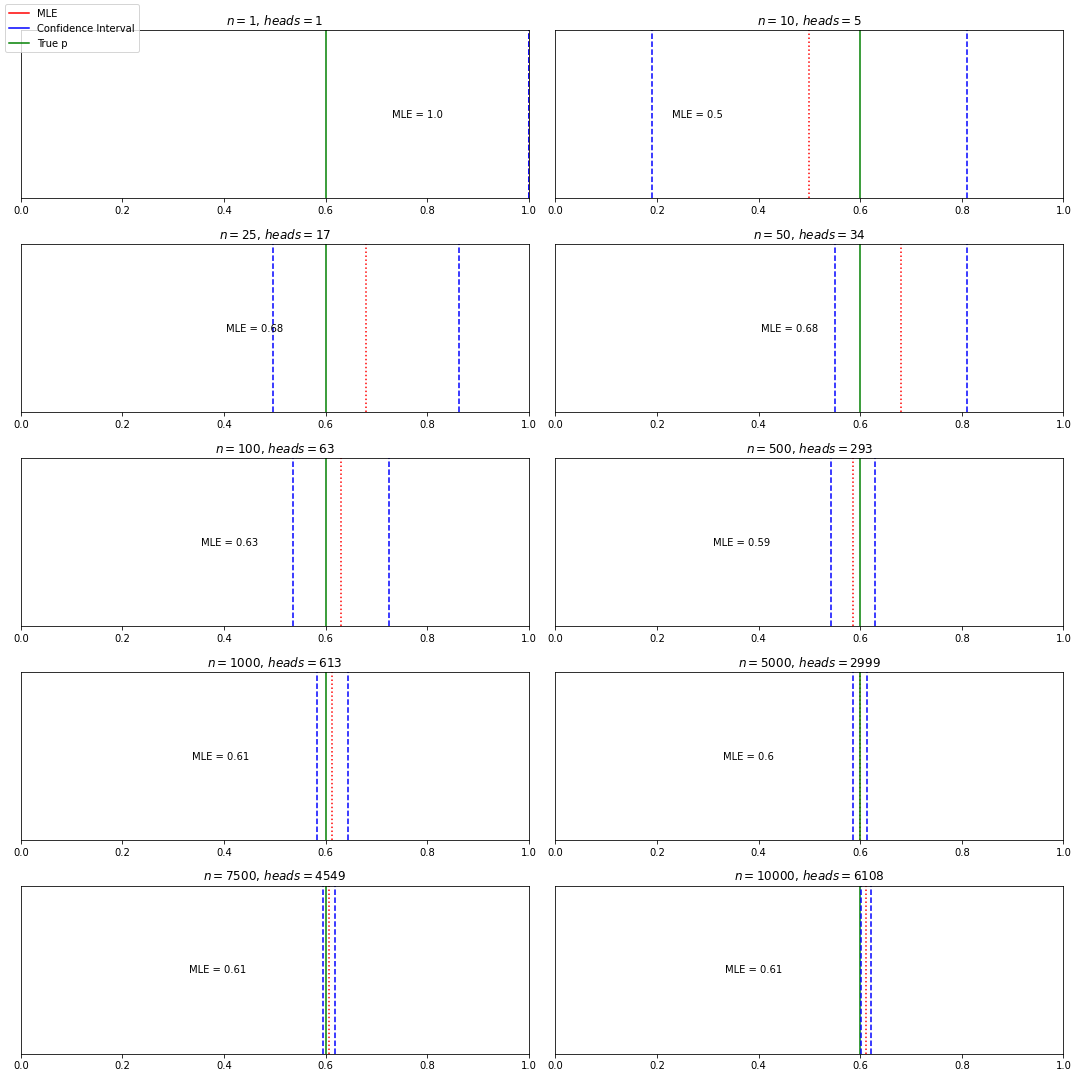

In [8]:
full_results = []
steps = [1, 10, 25, 50, 100, 500, 1000, 5000, 7500, 10000]

for i in steps:
    results = {}
    sample = data[:i]
    p_estimated = np.mean(sample)
    q_estimated = 1 - p_estimated
    standard_error = np.sqrt(p_estimated*q_estimated)/np.sqrt(i)
    ci = 1.96*standard_error
    
    results['size'] = i
    results['number_of_heads'] = sample.sum()
    results['p_estimated'] = p_estimated
    results['q_estimated'] = q_estimated
    results['standard_error'] = standard_error
    results['low'] = p_estimated - ci
    results['high'] = p_estimated + ci
    full_results.append(results)
    
# plot figure
figs,axs = plt.subplots(5, 2, figsize=(15,15))

axes = [(0,0),(0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1), (4,0), (4,1)]

for i,sample in enumerate(full_results):
    axs[axes[i]].axvline(sample['p_estimated'], color = 'red', linestyle ='dotted')
    axs[axes[i]].axvline(0.6, color = 'green', linestyle = 'solid')
    axs[axes[i]].axvline(sample['low'], color = 'blue', linestyle='dashed')
    axs[axes[i]].axvline(sample['high'], color = 'blue', linestyle='dashed')
    axs[axes[i]].get_yaxis().set_visible(False)
    axs[axes[i]].title.set_text("$ n = $" + str(sample['size']) + ", $heads = $" + str(sample['number_of_heads']))
    axs[axes[i]].text(sample['p_estimated'] - 0.22, 0.5, 'MLE = ' + str(np.round(sample['p_estimated'], 2)), 
    horizontalalignment='center', verticalalignment='center', transform=axs[axes[i]].transAxes)

blue_line = mlines.Line2D([], [], color='blue',
                          markersize=15, label='Confidence Interval')
red_line = mlines.Line2D([], [], color='red',
                          markersize=15, label='MLE')
green_line = mlines.Line2D([], [], color='green',
                          markersize=15, label='True p')

figs.legend(handles = [red_line, blue_line, green_line], loc=2)
figs.tight_layout();

In the plots above, we take snapshots of our results after 1 flip, 10 flips, 25 flips, and so on up to 10,000 flips. Within each snapshot, we plot our Maximum Likelihood Estimate using our data up until that point, that is the red line each plot (note that this is always simply the proportion of heads to total number of flips). In addition to the MLE, we've also plotted our 95% confidence interval for our estimate, this is represented by the two dotted blue lines. These plots give us an idea of how our estimates, and our confidence in those estimates, change as we flip the coin a repeated number of times.

As we continue to flip the coin over and over again, we gain more and more information about that coin's behavior. As a result, we should expect our estimates to become more and more precise, as well as more accurate. When we've only flipped the coin a couple of times (say 1 to 100 times), we can see that our confidence interval is quite wide. This is because we simply haven't seen enough information to rule out the likelihood that the true probability of heads lies somewhere to the sides of our current MLE. However, as we continue the flip the coin and observe more and more evidence about our parameter of interest, we see our confidence interval starting to narrow and hug the MLE. By the time we've flipped the coin 10,000 times, our confidence interval is only slightly to the side of our MLE. 

Let's think about this intuitively: as we begin to gain more evidence, we should become increasingly confident in our estimates. Additionally, and most important, we should expect our estimate to get closer and closer to the truth! This is the law of large numbers: as the size of a sample increase, its parameter estimand gets closer to the true value of the whole population. This is confirmed by the knowledge that we set the true probability of heads to 0.6, and indeed our MLE estimate after just 1,000 flips is 0.61 and it does not waver after this (only the confidence interval narrows).

## The Bayesian Approach

The material in this section - especially the simulation code is heavily indebted to https://tinyheero.github.io/2017/03/08/how-to-bayesian-infer-101.html [2].

As a refresher, recall that Bayes' Theorem estimates model parameters by establishing them as a distribution conditional on the data we have observed.

$P(\theta|X) = \frac{P(X|\theta)P(\theta)}{P(X)} = \frac{P(X , \theta)}{P(X)}$

- P(θ) is the prior distribution of our model parameters, which represents our opinions about the relationship between our outcome and predictor variables before we've seen any data. 

- P(X|θ) is the likelihood term, indicating how well the prior fits the observed data. 

- P(X) is the marginal distribution of the predictor variables. In other words, it represents the probability of having observed the data given all the possible values for θ. When dealing with discrete distributions, P(X) can be obtained by summing over all values of θ; in the continuous case it is obtained by integrating over θ.

## The Prior

The first step of the Bayesian workflow is specifying what our prior beliefs are about the outcome variable. For this example, this means encoding our beliefs about the probability that a coin flip comes up heads: that's right - we're putting a probability on a probability.

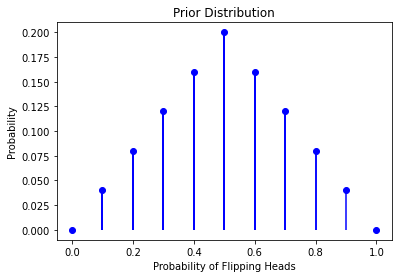

In [24]:
import pandas as pd
# generate the prior values
theta_values = list(np.linspace(0,1,11))
vals_pmin = np.minimum(np.linspace(0,1,11), np.linspace(1,0,11))
theta_probabilities = vals_pmin/sum(vals_pmin)
prior_distribution_df = pd.DataFrame(list(zip(theta_values, theta_probabilities)), columns = ("Theta", "Probability"))

def plot_distribution(df, title: str, likelihood = False):
    """
    Simple helper functions to plot prior, likelihood and posterior distributions
    """
    plt.scatter(df.iloc[:,0], df.iloc[:,1], color = 'blue')
    for i in range(len(df)):       
        plt.vlines(x = df.iloc[:i,0], color = 'blue', ymin = 0, ymax = df.iloc[:i,1])
    
    if likelihood:
        plt.ylabel("Likelihood")
    else:
        plt.ylabel("Probability")
    plt.xlabel("Probability of Flipping Heads")
    plt.title(title)

plot_distribution(prior_distribution_df, title = "Prior Distribution")

The prior distribution encapsulates our ideas around the probability of hitting heads without having seen any of the data. For the sake of simplicity, we are going to allow θ to only take on 10 values of 0.1 increments from 0 to 1. We're going to assume that we do not know that the coin is biased, and nothing indicates that it would be.

Consequently, let's build a distribution that is peaked at 0.5, with a value of 0.2: we are saying that there is a 20% chance that the coin is fair. We are also entertaining the possibility that the coin might not be fair, and that is reflected in the probabilities for θ ranging from 0.1 to 0.9. The only scenarios we believe not to be possible are those where p is equal to 0 (no chance of NEVER flipping heads) or 1 (no chance of ALWAYS flipping heads).

## The Likelihood
Let's now look at the likelihood, which updates the prior with the observed data in our sample. The equation for the binomial likelihood is simply its Probability Mass Function (PMF) [3].

$L(p|n, y) = {n \choose y} p^y(1-p)^{n-y} $

In the equation above, p is the probability of success (drawn from our prior distribution θ), n is the number of coin flips and y is the number of heads. For each value of theta in the parameter space, the likelihood function evaluates the probability of that theta value, given the data we've just observed. As an example, if we've observed 1 heads, then the likelihood of p= 0 must be 0 - since we've observed at least 1 heads, then the likelihood of NEVER flipping heads has to be 0.

We'll keep the same first 10 data points from the previous example, so we have 5 heads out of 10 flips.

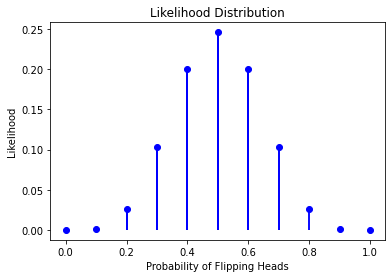

In [25]:
def create_likelihood_df(n, heads, prior_df):
    """
    Create a Binomial likelihood probability distribution dataframe 
    Parameters
    ----------
    n : The number of coin iid coin flips
    heads : The number of heads in n flips
    prior_df -  Dataframe containing a vector of theta values for the binomial distribution
    """
    likelihood_vals = stats.binom.pmf(heads, n, prior_df.Theta)
    likelihood_df = pd.DataFrame(list(zip(prior_df.Theta, likelihood_vals)), columns=('Theta', 'Likelihood'))

    return likelihood_df
 
likelihood_df = create_likelihood_df(10, 5, prior_distribution_df)
plot_distribution(likelihood_df, title =  "Likelihood Distribution", likelihood = True)

You'll notice that the likelihood is peaked around 0.5, with values further away from it getting increasingly smaller. That makes sense: the likelihood has updated our prior beliefs about θ with the data, which have shown that for 5 out of 10 flips were heads - given the data we've observed, the most likely true value of theta is 0.5. Thus 0.5 will get the highest likelihood. Vice-versa, values such as 0.1 and 0.9 are very unlikely of being the true value, and we see that reflected in the chart accordingly. In turn, values at the extreme are not corroborated by the data, and are consequently given very small likelihood values.

It is important to note however, that the likelihood is not a valid probability distribution. You can check that yourself by summing all of the probabilities for θ, the result does not add to 1! That's where the normalizing constant / denominator comes in: dividing each likelihood probabilities by the normalizing constant (which is a scalar) yields a valid probability distribution that we call the posterior.

## The Posterior Distribution
Now that we've calculated our likelihood values, we obtain the numerator of Bayes' Theorem by multiplying them with the prior values, which yields the joint distribution of θ and X. In turn, the denominator is obtained by summing over the resulting vector (marginalizing out θ).
You may have seen that the denominator is what often makes Bayesian Inference computationally intractable. Later blog posts will address why that is the case, but for this scenario we have the advantage of working with a parameter space that is discrete (summation is easier than integration) and that only takes on 10 values, so calculating the denominator is entirely feasible.

In the next blog post, we'll deal with what happens when we work with continuous distributions. For now, note that our ability to derive the marginal distribution of X is possible because we are working with one variable, which in turn has very few (11) values. This makes summing over all of the values in the parameter space easy, which would not be the case if we were dealing with multiple predictors that can take on thousands (or an infinite! as in the continuous case) amount of values.